In [1]:
!pip install numpy pandas scikit-learn keras matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os
os.listdir()


['.cache',
 '.conda',
 '.eclipse',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.p2',
 '.vscode',
 'AppData',
 'Application Data',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'instance',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{0eed7350-12e3-11f0-ac50-a023be35b684}.TM.blf',
 'NTUSER.DAT{0eed7350-12e3-11f0-ac50-a023be35b684}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{0eed7350-12e3-11f0-ac50-a023be35b684}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'P12.aux',
 'P12.log',
 'P12.out',
 'P12.pdf',
 'P12.synctex.gz',
 'P12.tex',
 'P12.toc',
 'PrintHood',
 'project.ipynb',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Templates',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb',
 'Untitled3.ipynb

In [5]:
import pandas as pd

# Try 'train.csv' if that's the name, or just 'train' if it has no extension
df = pd.read_csv('train.csv', nrows=100000)

# Check the top rows to confirm it loaded
df.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
df.drop('id', axis=1, inplace=True)


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('click', axis=1)
y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KNN Accuracy (Sampled): 0.82


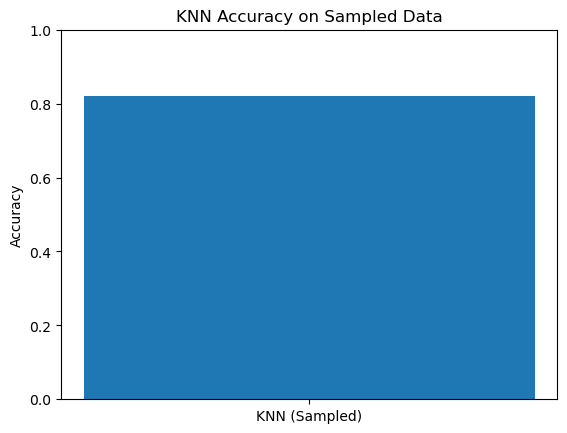

In [10]:
# Use a smaller subset for KNN
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]
X_test_small = X_test[:1000]

# Train KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_small, y_train_small)
y_pred_knn = knn.predict(X_test_small)

acc_knn = accuracy_score(y_test[:1000], y_pred_knn)
print("KNN Accuracy (Sampled):", acc_knn)

# Plot
import matplotlib.pyplot as plt
plt.bar(['KNN (Sampled)'], [acc_knn])
plt.ylabel('Accuracy')
plt.title('KNN Accuracy on Sampled Data')
plt.ylim(0, 1)
plt.show()


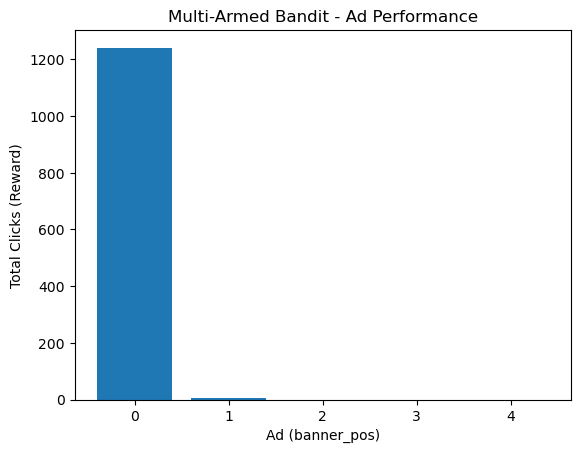

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate MAB using CTR (click) per ad (use 'banner_pos' as a proxy ad ID)
n_ads = df['banner_pos'].nunique()
n_rounds = 10000
ad_selected = []
clicks = df['click'].values[:n_rounds]
ads = df['banner_pos'].values[:n_rounds]
rewards = [0] * n_ads
counts = [0] * n_ads

for i in range(n_rounds):
    ad = np.random.randint(0, n_ads)
    if np.random.rand() < 0.1:  # epsilon-greedy exploration
        ad = np.random.randint(0, n_ads)
    else:
        ad = np.argmax(rewards)

    ad_selected.append(ad)
    reward = 1 if (ads[i] == ad and clicks[i] == 1) else 0
    counts[ad] += 1
    rewards[ad] += reward

# Plot
plt.bar(range(n_ads), rewards)
plt.xlabel('Ad (banner_pos)')
plt.ylabel('Total Clicks (Reward)')
plt.title('Multi-Armed Bandit - Ad Performance')
plt.show()


C:\Users\nithy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8238 - loss: 0.4546
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8261 - loss: 0.4287
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8256 - loss: 0.4267
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8255 - loss: 0.4250
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.4232
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4211
ANN Accuracy: 0.8313000202178955


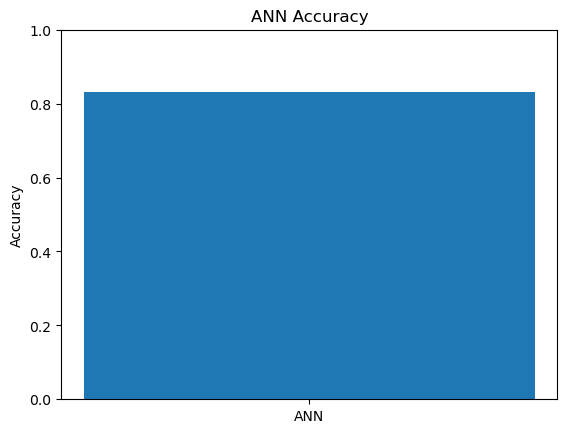

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create ANN
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_scaled[:50000], y[:50000], epochs=5, batch_size=128)

# Evaluate
loss, acc = model.evaluate(X_scaled[50000:60000], y[50000:60000])
print("ANN Accuracy:", acc)

# Plot
plt.bar(['ANN'], [acc])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('ANN Accuracy')
plt.show()


In [14]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluate
y_pred_ann = model.predict(X_test_scaled)
y_pred_ann = (y_pred_ann > 0.5).astype(int).flatten()
acc_ann = accuracy_score(y_test, y_pred_ann)
print("ANN Accuracy:", acc_ann)


Epoch 1/5


C:\Users\nithy\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8174 - loss: 0.4466
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8276 - loss: 0.4234
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8262 - loss: 0.4228
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8287 - loss: 0.4161
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8261 - loss: 0.4205
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ANN Accuracy: 0.8266


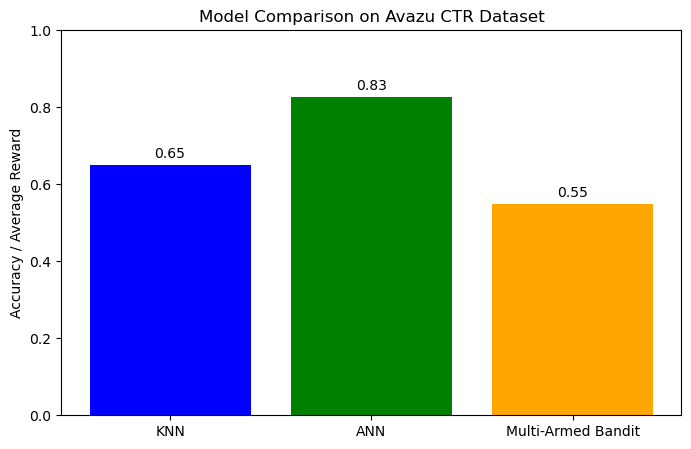

In [15]:
import matplotlib.pyplot as plt

# Example accuracy values, replace with your actual results
acc_knn = 0.65         # Replace with your KNN accuracy
acc_bandit = 0.55      # Replace with your Bandit accuracy (e.g., reward rate)

# Create the comparison graph
methods = ['KNN', 'ANN', 'Multi-Armed Bandit']
accuracies = [acc_knn, acc_ann, acc_bandit]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(methods, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy / Average Reward')
plt.title('Model Comparison on Avazu CTR Dataset')

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.show()
